#     

In [1]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
diabetes=pd.read_csv('C:/Users/Lenovo/downloads/diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.shape

(768, 9)

In [5]:
diabetes.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12    

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

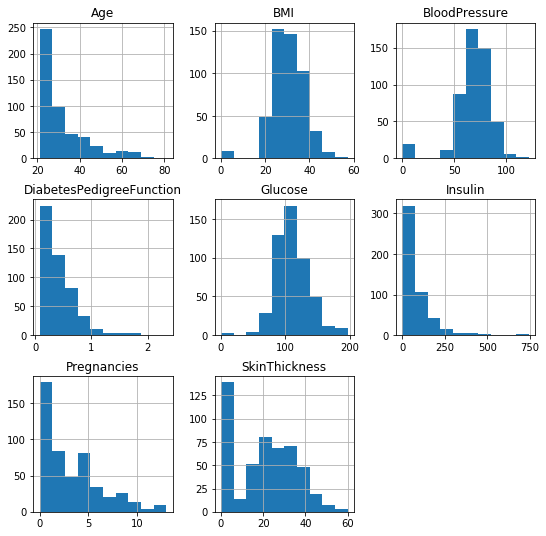

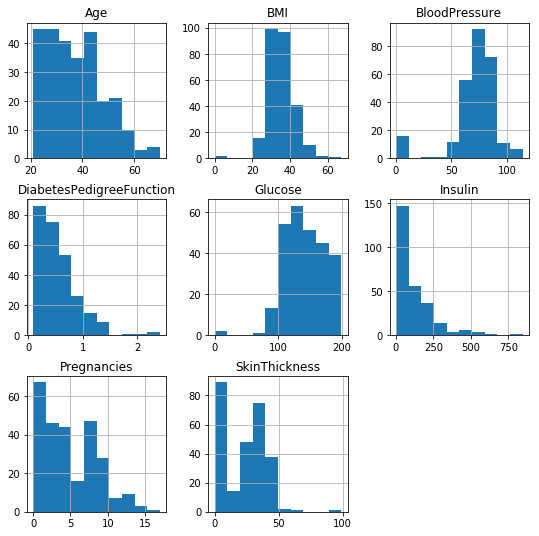

In [6]:
diabetes.groupby('Outcome').hist(figsize=(9,9))

In [7]:
X=diabetes.iloc[:,:-1].values
Y=diabetes.iloc[:,8].values

In [8]:
print(diabetes.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


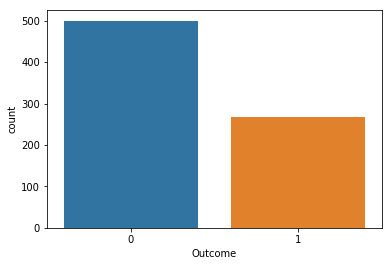

In [9]:
sb.countplot(diabetes['Outcome'],label="Count")

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(diabetes.loc[:,diabetes.columns!='Outcome'],diabetes['Outcome'],stratify=diabetes['Outcome'],random_state=66)

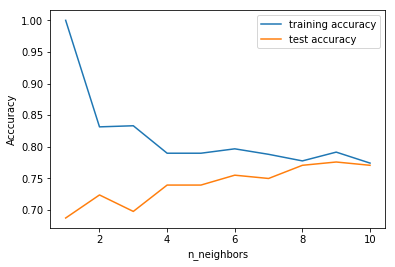

In [11]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
#try n_neighbors from 1to 10
neighbors_settings=range(1,11)
for n_neighbors in neighbors_settings:
    #build the model
    Knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    Knn.fit(X_train,y_train)
    #record training set accuracy 
    training_accuracy.append(Knn.score(X_train,y_train))
    #record test set accuracy
    test_accuracy.append(Knn.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Acccuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [12]:
Knn=KNeighborsClassifier(n_neighbors=9)
Knn.fit(X_train,y_train)
print('Accuracy of K-NN classifier on training set:{:.2f}'.format(Knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on test set:{:.2f}'.format(Knn.score(X_test,y_test)))

Accuracy of K-NN classifier on training set:0.79
Accuracy of K-NN classifier on test set:0.78


# Model Evaluation technique
 

#  ROC curve receiver operating characteristics

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [15]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt,plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend()
    plt.show()

In [16]:
probs=clf.predict_proba(X_test)
probs

NameError: name 'clf' is not defined